**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load and Inspect Data**

In [3]:
# Load CSV
df = pd.read_csv('/content/Query1.csv')

# Quick look
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order_ID             18000 non-null  object
 1   Customer_Name        18000 non-null  object
 2   Order_Date           18000 non-null  object
 3   State                18000 non-null  object
 4   City                 18000 non-null  object
 5   Amount               18000 non-null  int64 
 6   Profit               18000 non-null  int64 
 7   Quantity             18000 non-null  int64 
 8   Category             18000 non-null  object
 9   Sub_Category         18000 non-null  object
 10  Month_of_Order_Date  18000 non-null  object
 11  Target               18000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


,Order_ID,Customer_Name,Order_Date,State,City,Amount,Profit,Quantity,Category,Sub_Category,Month_of_Order_Date,Target
count,18000,18000,18000,18000,18000,18000.000000,18000.000000,18000.000000,18000,18000,18000,18000.000000
unique,500,332,307,19,24,NaN,NaN,NaN,3,17,12,NaN
top,B-26056,Shubham,3/10/2019,Madhya Pradesh,Indore,NaN,NaN,NaN,Clothing,Saree,4/18/2025,NaN
freq,144,396,396,4080,3204,NaN,NaN,NaN,11388,2520,1500,NaN
mean,NaN,NaN,NaN,NaN,NaN,287.668000,15.970000,3.743333,NaN,NaN,NaN,13175.150000
std,NaN,NaN,NaN,NaN,NaN,460.909582,169.088873,2.184274,NaN,NaN,NaN,2586.480712
min,NaN,NaN,NaN,NaN,NaN,4.000000,-1981.000000,1.000000,NaN,NaN,NaN,9000.000000
25%,NaN,NaN,NaN,NaN,NaN,45.000000,-9.250000,2.000000,NaN,NaN,NaN,11300.000000
50%,NaN,NaN,NaN,NaN,NaN,118.000000,9.000000,3.000000,NaN,NaN,NaN,14000.000000
75%,NaN,NaN,NaN,NaN,NaN,322.000000,38.000000,5.000000,NaN,NaN,NaN,16000.000000


**Data Cleaning & Quality Checks**

In [4]:
# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

Order_ID               0
Customer_Name          0
Order_Date             0
State                  0
City                   0
Amount                 0
Profit                 0
Quantity               0
Category               0
Sub_Category           0
Month_of_Order_Date    0
Target                 0
dtype: int64
0


**Feature Engineering**

In [5]:
# Extract year and month
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Period'] = df['Order_Date'].dt.to_period('M')

# Profit Margin
df['Profit_Margin'] = (df['Profit'] / df['Amount']).replace([np.inf, -np.inf], 0) * 100

# Target Variance
df['Variance'] = df['Amount'] - df['Target']
df['Variance%'] = (df['Variance'] / df['Target'].replace(0, np.nan)) * 100

**Univariate Analysis (Distributions)**

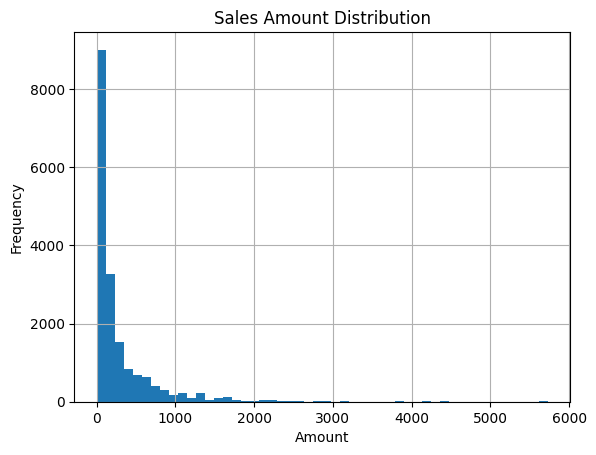

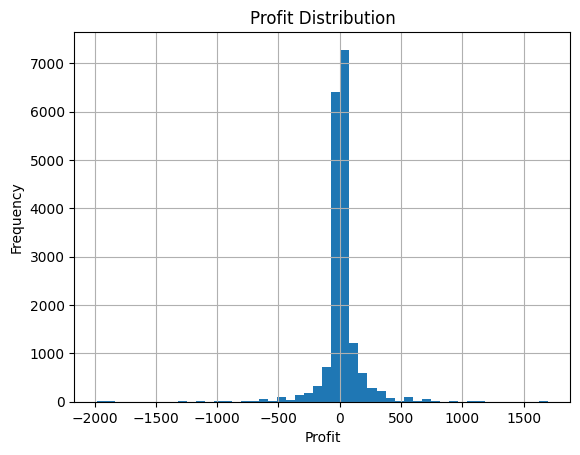

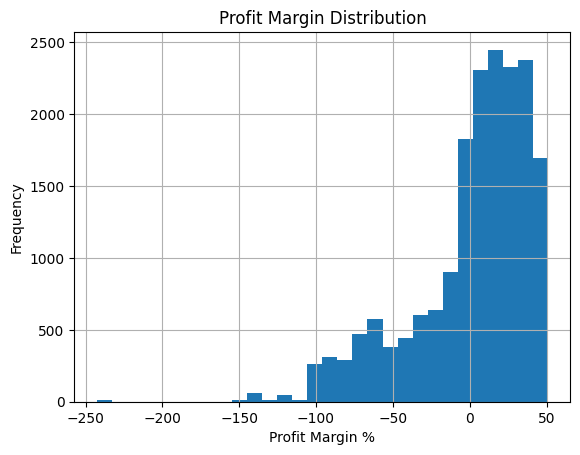

In [6]:
# Sales Amount Distribution
df['Amount'].hist(bins=50)
plt.title("Sales Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Profit Distribution
df['Profit'].hist(bins=50)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

# Profit Margin Distribution
df['Profit_Margin'].hist(bins=30)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin %")
plt.ylabel("Frequency")
plt.show()

**Bivariate Analysis (Relationships)**

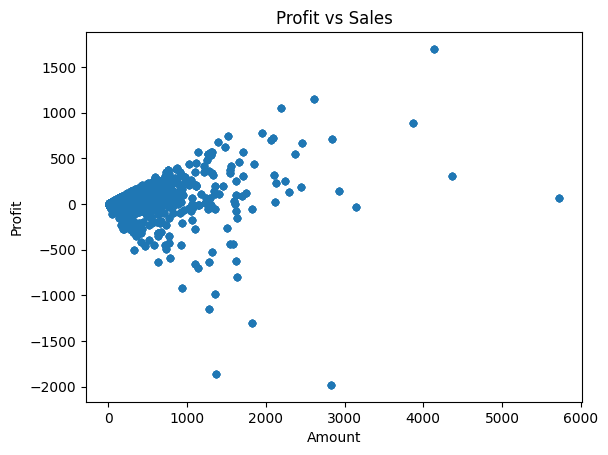

                 Amount    Profit  Quantity    Target      Year     Month  \
Amount         1.000000  0.242045  0.352052 -0.270494  0.013041  0.007931   
Profit         0.242045  1.000000  0.002441 -0.023608  0.141277 -0.010850   
Quantity       0.352052  0.002441  1.000000 -0.014762 -0.001382 -0.000030   
Target        -0.270494 -0.023608 -0.014762  1.000000  0.002363  0.017987   
Year           0.013041  0.141277 -0.001382  0.002363  1.000000 -0.803458   
Month          0.007931 -0.010850 -0.000030  0.017987 -0.803458  1.000000   
Profit_Margin  0.067355  0.516490 -0.042610  0.060957  0.309692 -0.046710   
Variance       0.422440  0.062835  0.072963 -0.986870 -0.000037 -0.015604   
Variance%      0.975304  0.238526  0.331504 -0.380580  0.016410  0.004906   

               Profit_Margin  Variance  Variance%  
Amount              0.067355  0.422440   0.975304  
Profit              0.516490  0.062835   0.238526  
Quantity           -0.042610  0.072963   0.331504  
Target              0

In [7]:
# Scatter: Sales vs Profit
df.plot(kind="scatter", x="Amount", y="Profit", alpha=0.5)
plt.title("Profit vs Sales")
plt.show()

# Correlation Matrix
print(df.corr(numeric_only=True))

**Time Series Analysis**

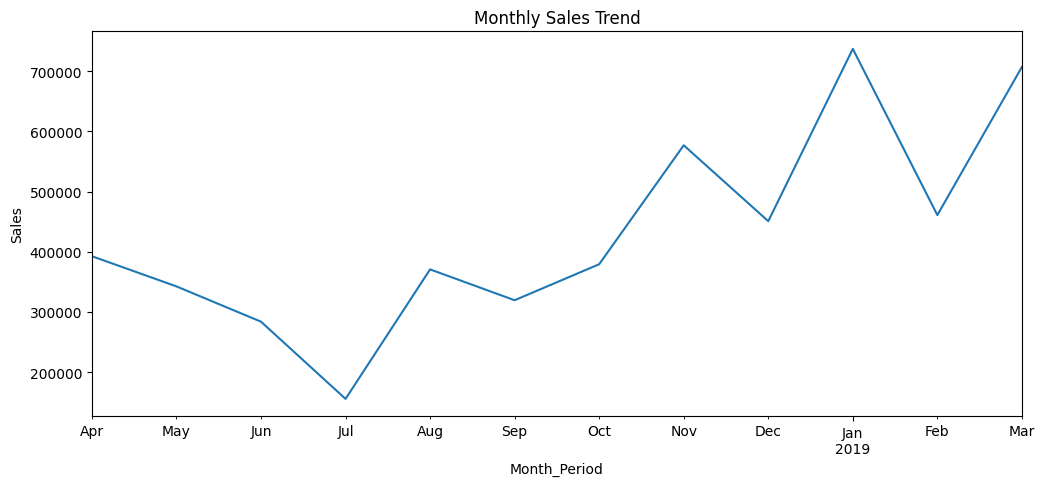

/tmp/ipython-input-4177092072.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_margin = df.groupby('Month_Period').apply(lambda x: x['Profit'].sum() / x['Amount'].sum())


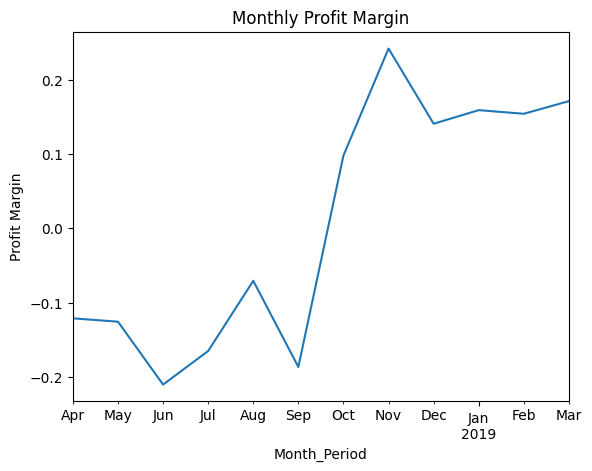

In [8]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month_Period')['Amount'].sum()
monthly_sales.plot(figsize=(12,5), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

# Monthly Profit Margin Trend
monthly_margin = df.groupby('Month_Period').apply(lambda x: x['Profit'].sum() / x['Amount'].sum())
monthly_margin.plot(title="Monthly Profit Margin")
plt.ylabel("Profit Margin")
plt.show()

**Category/Sub-Category Analysis**

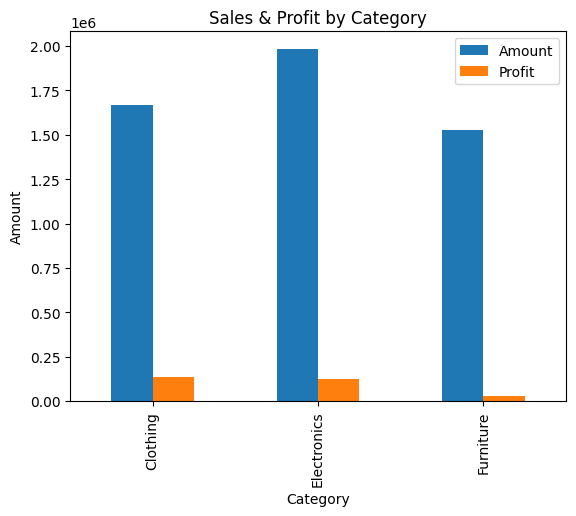

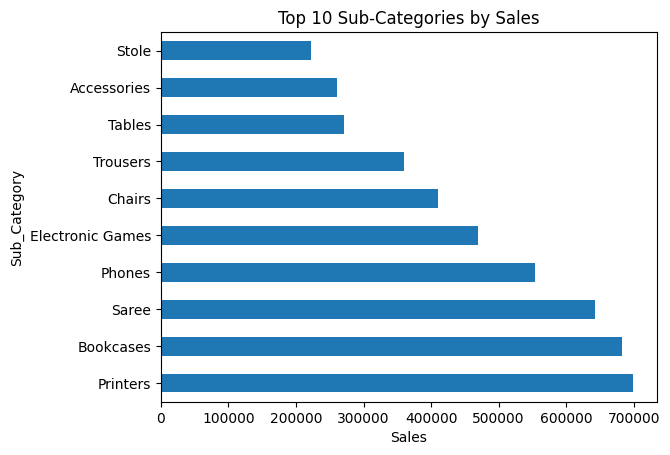

In [9]:
# Sales & Profit by Category
df.groupby('Category')[['Amount','Profit']].sum().plot.bar(title="Sales & Profit by Category")
plt.ylabel("Amount")
plt.show()

# Top 10 Sub-Categories by Sales
top_subcat = df.groupby('Sub_Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_subcat.plot(kind="barh", title="Top 10 Sub-Categories by Sales")
plt.xlabel("Sales")
plt.show()

**Geographic Analysis**

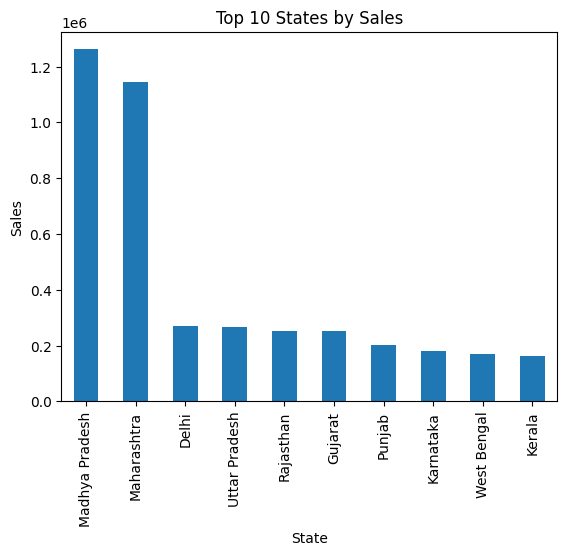

In [10]:
# Top 10 States by Sales
df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(title="Top 10 States by Sales")
plt.ylabel("Sales")
plt.show()

**Target vs Actual Performance**

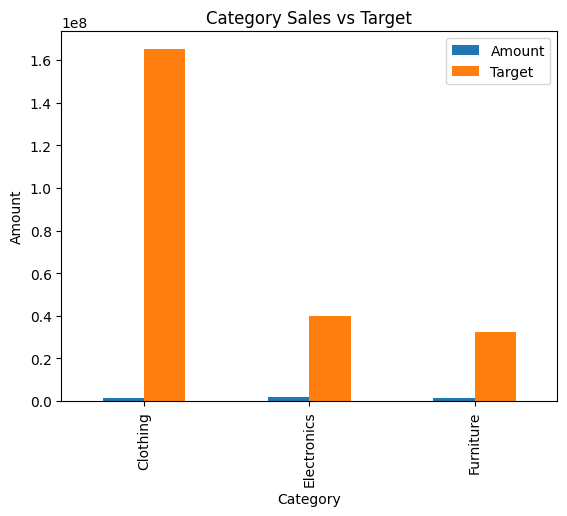

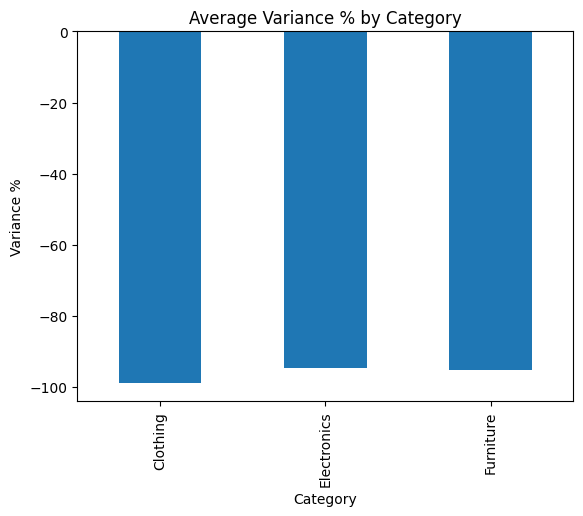

In [11]:
# Category Sales vs Target
cat = df.groupby('Category').agg({'Amount':'sum','Target':'sum'}).reset_index()
cat.plot(x='Category', y=['Amount','Target'], kind='bar', title='Category Sales vs Target')
plt.ylabel("Amount")
plt.show()

# Average Variance % by Category
df.groupby('Category')['Variance%'].mean().plot.bar(title="Average Variance % by Category")
plt.ylabel("Variance %")
plt.show()

In [13]:
print("EDA completed successfully.")

EDA completed successfully.
